In [1]:
using DynamicalSystems
using DifferentialEquations
using OrdinaryDiffEq
using StaticArrays

using CairoMakie

In [2]:
# a, b, c, d -> 1, 2, 3, 4 - index parametres
# r, s, xR, I -> 5, 6, 7, 8 - index parametres
function model_HR(u, p, t)
    
    a, b, c, d, r, s, xR, I = p
    x, y, z = u
    
    du1 = y + b * x^2 - a * x^3 - z + I
    du2 = c - d * x^2 - y
    du3 = r * ( s * ( x - xR ) - z )
    
    return SVector(du1, du2, du3)
end

model_HR (generic function with 1 method)

In [3]:
a, b, c, d = 1.0, 3.0, 1.0, 5.0
r, s, xR, I = 0.025015, 4.0, 1.6, 2.4999

p = SA[a, b, c, d, r, s, xR, I]
u0 = SA[0.0, 0.0, 0.0]
tspan = (0.0, 100000.0);

In [4]:
prob = ODEProblem(model_HR, u0, tspan, p)

ODEProblem with uType SVector{3, Float64} and tType Float64. In-place: false
timespan: (0.0, 100000.0)
u0: 3-element SVector{3, Float64} with indices SOneTo(3):
 0.0
 0.0
 0.0

In [5]:
sol = solve(prob, Vern9(), adaptive = false, dt = 0.1,  abstol = 1e-14, reltol = 1e-14, maxiters = 50000000);

In [6]:
y = sol[1, :]
y = y[floor(Int, length(y) / 2):end ];

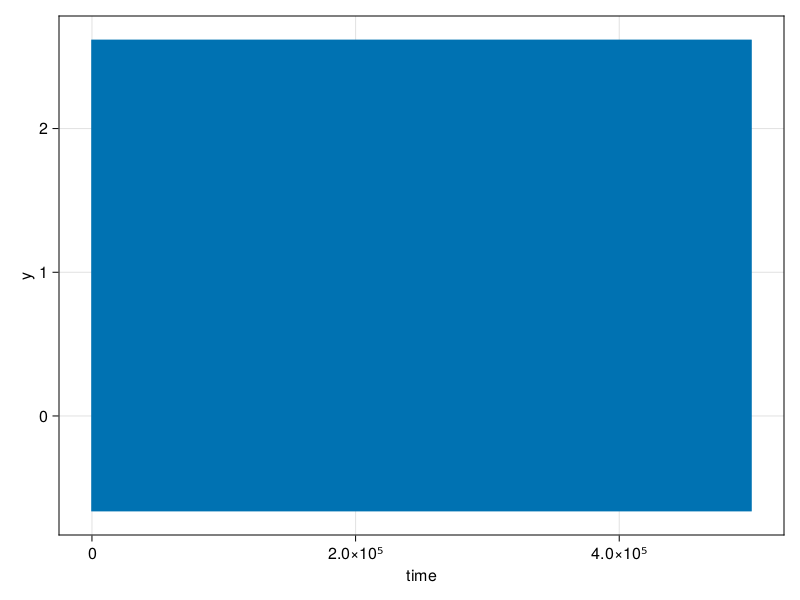

In [7]:
f = Figure()
ax = Axis(f[1, 1], xlabel = "time", ylabel = "y")
lines!(ax, y)
f